<a href="https://colab.research.google.com/github/gedeck/mistat-code-solutions/blob/main/ModernStatistics/notebooks/Chap006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chapter 6
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
!pip install mistat --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.7 MB/s eta 0:00:00


# Time Series Analysis and Prediction

In [2]:
import datetime
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ValueWarning
import pandas as pd

import random
import numpy as np
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
import mistat

## The Components of a Time Series

### The Trend and Covariances

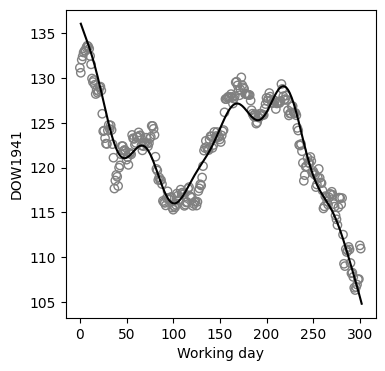

In [3]:
dow1941 = mistat.load_data('DOW1941')
t = np.arange(1, len(dow1941) + 1)
x = (t - 151) / 302
omega = 4 * np.pi * t / 302
ft = (123.34 + 27.73 * x - 15.83* x ** 2 - 237.00 * x**3
      + 0.1512 * np.cos(omega) + 1.738 * np.sin(omega)
      + 1.770 * np.cos(2 * omega) - 0.208 * np.sin(2 * omega)
      - 0.729 * np.cos(3 * omega) + 0.748 * np.sin(3 * omega))

fig, ax = plt.subplots(figsize=[4, 4])
ax.scatter(dow1941.index, dow1941, facecolors='none', edgecolors='grey')
ax.plot(t, ft, color='black')
ax.set_xlabel('Working day')
ax.set_ylabel('DOW1941')
plt.show()

### Analyzing Time Series With Python

In [4]:
dow1941 = mistat.load_data('DOW1941_DATE')

# convert Date column to Python datetime
dates = pd.to_datetime(dow1941['Date'], format='%Y-%m-%d')
dow1941_ts = pd.Series(dow1941['Open'], name='Dow_Jones_Index')
dow1941_ts.index = pd.DatetimeIndex(dates)

dow1941_ts.head()

Date
1941-01-02    131.1
1941-01-03    130.6
1941-01-04    132.0
1941-01-06    132.4
1941-01-07    132.8
Name: Dow_Jones_Index, dtype: float64

In [5]:
from statsmodels.tsa import tsatools
dow1941_df = tsatools.add_trend(dow1941_ts, trend='ct')
dow1941_df.head()

,Dow_Jones_Index,const,trend
Date,,,
1941-01-02,131.1,1.0,1.0
1941-01-03,130.6,1.0,2.0
1941-01-04,132.0,1.0,3.0
1941-01-06,132.4,1.0,4.0
1941-01-07,132.8,1.0,5.0


Intercept    125.929262
trend         -0.026070
dtype: float64
r2-adj: 0.151


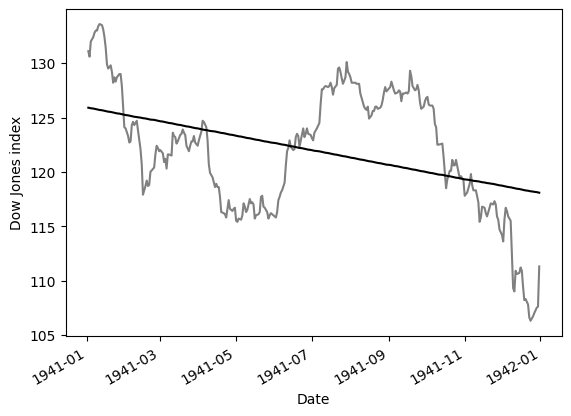

In [6]:
from statsmodels.tsa import tsatools
dow1941_df = tsatools.add_trend(dow1941_ts, trend='ct')
model_1 = smf.ols(formula='Dow_Jones_Index ~ trend + 1', data=dow1941_df).fit()
print(model_1.params)
print(f'r2-adj: {model_1.rsquared_adj:.3f}')

ax = dow1941_ts.plot(color='grey')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
model_1.predict(dow1941_df).plot(ax=ax, color='black')
plt.show()

Intercept        135.306337
I(trend ** 3)     -0.000009
I(trend ** 2)      0.003788
trend             -0.450896
dtype: float64
r2-adj: 0.809


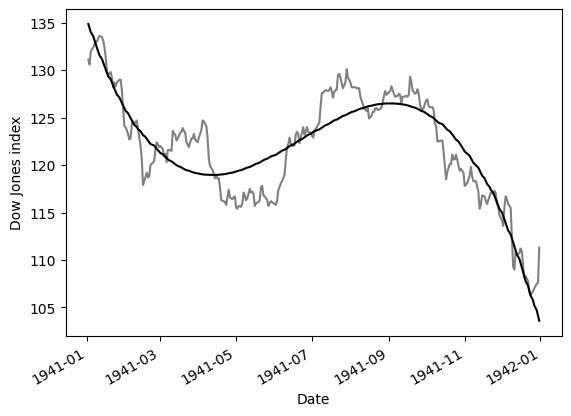

In [7]:
dow1941_df = tsatools.add_trend(dow1941_ts, trend='ct')
formula = 'Dow_Jones_Index ~ I(trend**3) + I(trend**2) + trend + 1'
model_2 = smf.ols(formula=formula, data=dow1941_df).fit()
print(model_2.params)
print(f'r2-adj: {model_2.rsquared_adj:.3f}')

ax = dow1941_ts.plot(color='grey')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
model_2.predict(dow1941_df).plot(ax=ax, color='black')
plt.show()

Intercept         134.580338
C(month)[T.2]      -3.247325
C(month)[T.3]       0.244691
C(month)[T.4]      -2.046448
C(month)[T.5]      -5.612228
C(month)[T.6]      -2.137326
C(month)[T.7]       2.308240
C(month)[T.8]       0.667104
C(month)[T.9]       1.662265
C(month)[T.10]     -1.316258
C(month)[T.11]     -1.758233
C(month)[T.12]     -0.419919
I(trend ** 3)      -0.000007
I(trend ** 2)       0.002990
trend              -0.359448
dtype: float64
r2-adj: 0.909


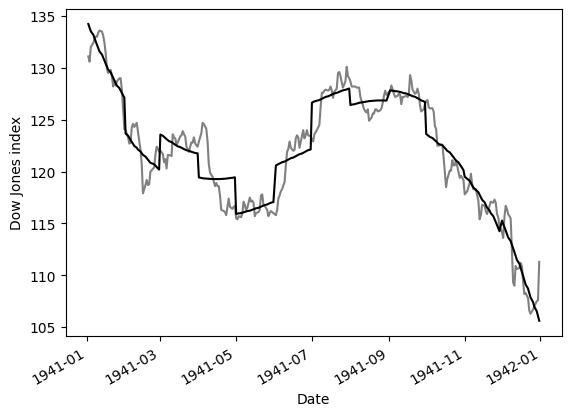

In [8]:
dow1941_df = tsatools.add_trend(dow1941_ts, trend='ct')
dow1941_df['month'] = dow1941_df.index.month
formula = 'Dow_Jones_Index ~ C(month) + I(trend**3) + I(trend**2) + trend + 1'
model_3 = smf.ols(formula=formula, data=dow1941_df).fit()
print(model_3.params)
print(f'r2-adj: {model_3.rsquared_adj:.3f}')

ax = dow1941_ts.plot(color='grey')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
model_3.predict(dow1941_df).plot(ax=ax, color='black')
plt.show()

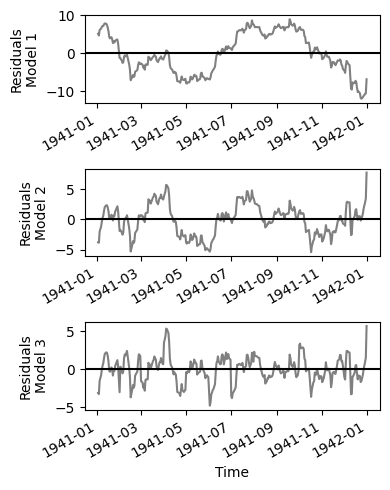

In [9]:
fig, axes = plt.subplots(figsize=[4, 5], nrows=3)
def residual_plot(model, ax, title):
  model.resid.plot(color='grey', ax=ax)
  ax.set_xlabel('')
  ax.set_ylabel(f'Residuals\n{title}')
  ax.axhline(0, color='black')
residual_plot(model_1, axes[0], 'Model 1')
residual_plot(model_2, axes[1], 'Model 2')
residual_plot(model_3, axes[2], 'Model 3')
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

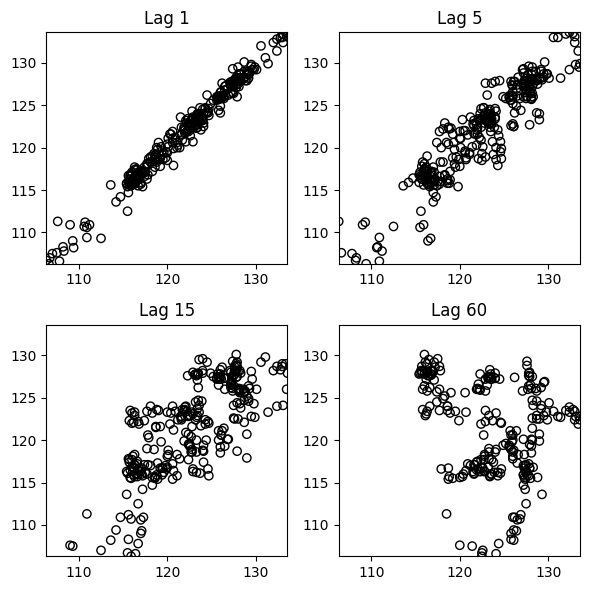

In [10]:
def plotLag(ts, lag, ax, limits):
  ax.scatter(ts[:-lag], ts[lag:], facecolors='none', edgecolors='black')
  ax.set_title(f'Lag {lag}')
  ax.set_xlim(*limits)
  ax.set_ylim(*limits)

fig, axes = plt.subplots(figsize=[6, 6], nrows=2, ncols=2)
limits = [dow1941_ts.min(), dow1941_ts.max()]
plotLag(dow1941_ts, 1, axes[0][0], limits)
plotLag(dow1941_ts, 5, axes[0][1], limits)
plotLag(dow1941_ts, 15, axes[1][0], limits)
plotLag(dow1941_ts, 60, axes[1][1], limits)

plt.tight_layout()
plt.show()

## Covariance Stationary Time Series

### Moving Averages

### Auto-Regressive Time Series

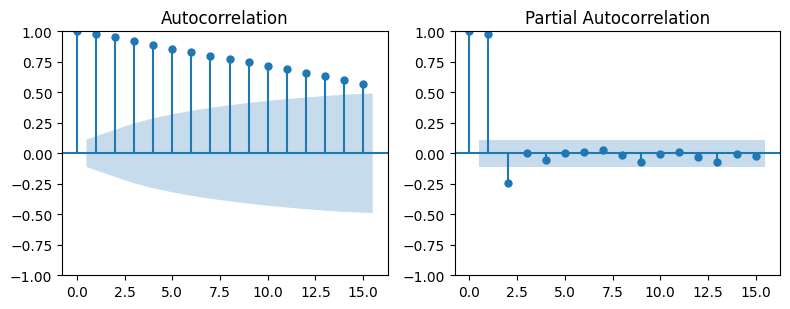

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dow_acf = acf(dow1941_ts, nlags=15, fft=True)
dow_pacf = pacf(dow1941_ts, nlags=15)

fig, axes = plt.subplots(ncols=2, figsize=[8, 3.2])
plot_acf(dow1941_ts, lags=15, ax=axes[0])
plot_pacf(dow1941_ts, lags=15, method='ywm', ax=axes[1])
plt.tight_layout()
plt.show()

In [12]:
print(f'  k     rho(k)    rho*(k)')
for i, (v1, v2) in enumerate(zip(dow_acf, dow_pacf)):
  print(f'{i:3d}   {v1:8.4f}   {v2:8.4f}')

  k     rho(k)    rho*(k)
  0     1.0000     1.0000
  1     0.9805     0.9838
  2     0.9521    -0.2949
  3     0.9222     0.0220
  4     0.8907    -0.0737
  5     0.8592     0.0117
  6     0.8290     0.0165
  7     0.8009     0.0360
  8     0.7738    -0.0203
  9     0.7451    -0.0859
 10     0.7162     0.0048
 11     0.6885     0.0179
 12     0.6607    -0.0346
 13     0.6309    -0.0839
 14     0.6008     0.0053
 15     0.5708    -0.0349


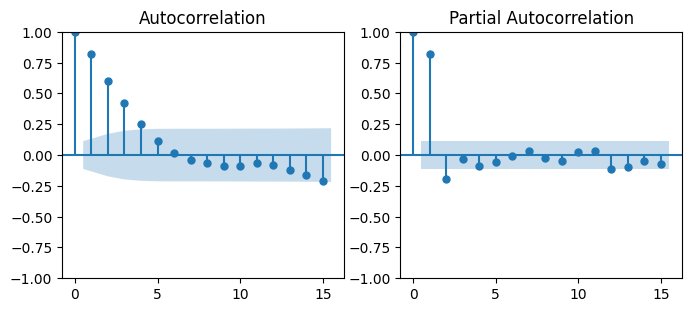

In [13]:
dow_acf = acf(model_3.resid, nlags=15, fft=True)
fig, axes = plt.subplots(ncols=2, figsize=[8, 3.2])
plot_acf(model_3.resid, lags=15, ax=axes[0])
plot_pacf(model_3.resid, lags=15, method='ywm', ax=axes[1])
plt.show()

In [14]:
print(f'  k     rho(k)')
for i, v1 in enumerate(dow_acf):
  print(f'{i:3d}   {v1:8.4f}')

  k     rho(k)
  0     1.0000
  1     0.8172
  2     0.6041
  3     0.4213
  4     0.2554
  5     0.1142
  6     0.0137
  7    -0.0366
  8    -0.0646
  9    -0.0895
 10    -0.0905
 11    -0.0682
 12    -0.0790
 13    -0.1214
 14    -0.1641
 15    -0.2087


### Auto-Regressive Moving Averages Time Series

### Integrated Auto-Regressive Moving Average Time Series

### Applications with Python

In [15]:
# ignore ValueWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=(ValueWarning, UserWarning))

Best model: (2, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


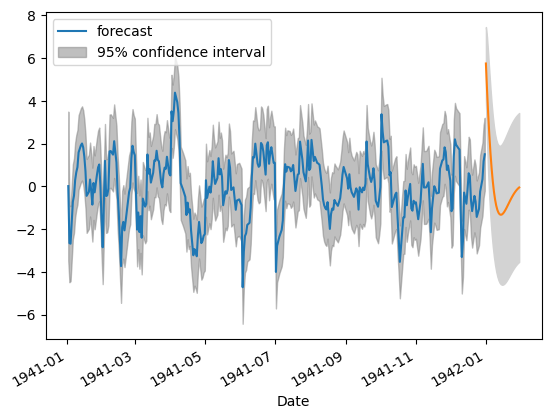

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Identify optimal ARMA options using the AIC score
bestModel = None
bestAIC = None
for ar in range(0, 5):
  for ma in range(0, 5):
    model = ARIMA(model_3.resid, order=(ar, 0, ma)).fit()
    if bestAIC is None or bestAIC > model.aic:
      bestAIC = model.aic
      bestModel = (ar, 0, ma)
print(f'Best model: {bestModel}')

model = ARIMA(model_3.resid, order=bestModel).fit()

prediction = model.get_forecast(30).summary_frame()
prediction['date'] = [max(dow1941_ts.index) + datetime.timedelta(days=i)
                      for i in range(1, len(prediction) + 1)]

plot_predict(model)
ax = plt.gca()

ax.plot(prediction['date'], prediction['mean'])
ax.fill_between(prediction['date'],
                prediction['mean_ci_lower'], prediction['mean_ci_upper'],
                color='lightgrey')
plt.show()

In [17]:
# restore default setting
warnings.simplefilter('default', category=ValueWarning)

## Linear Predictors for Covariance Stationary Time Series

### Optimal Linear Predictors

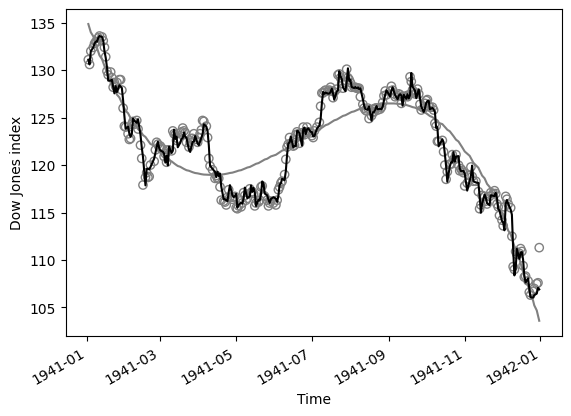

PMSE(trend) = 6.3315
PMSE(corrected) = 0.5580


In [18]:
predictedError = mistat.optimalLinearPredictor(model_2.resid,11,nlags=10)
predictedTrend = model_2.predict(dow1941_df)
correctedTrend = predictedTrend + predictedError

fig, ax = plt.subplots()
ax.scatter(dow1941_ts.index, dow1941_ts,
           facecolors='none', edgecolors='grey')
predictedTrend.plot(ax=ax, color='grey')
correctedTrend.plot(ax=ax, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
plt.show()

print(f'PMSE(trend) = {np.mean((predictedTrend - dow1941_ts)**2):.4f}')
print(f'PMSE(corrected) = {np.mean((correctedTrend-dow1941_ts)**2):.4f}')

## Predictors for Non-Stationary Time Series

### Quadratic LSE Predictors

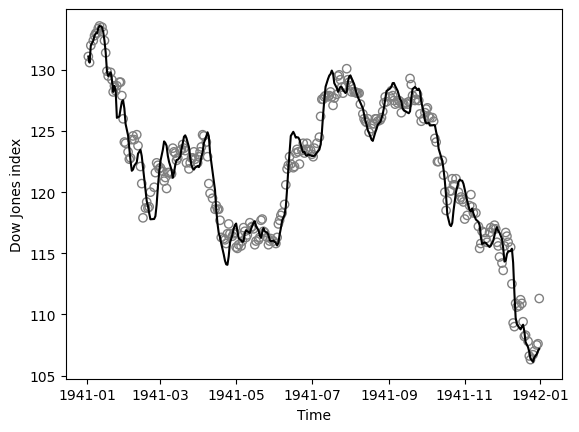

PMSE(quadratic) = 1.9483


In [19]:
quadPrediction = mistat.quadraticPredictor(dow1941_ts, 20, 1)

fig, ax = plt.subplots()
ax.scatter(dow1941_ts.index, dow1941_ts,
           facecolors='none', edgecolors='grey')
ax.plot(dow1941_ts.index, quadPrediction, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
plt.show()

print(f'PMSE(quadratic) = {np.mean((quadPrediction-dow1941_ts)**2):.4f}')

### Moving Average Smoothing Predictors

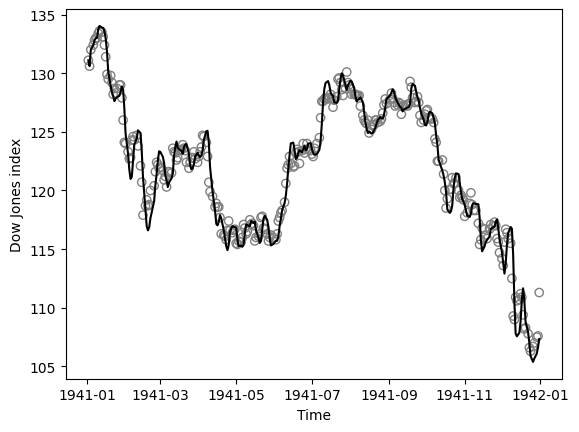

PMSE(MAS) = 1.4917


In [20]:
masPrediction = mistat.masPredictor(dow1941_ts, 3, 1)

fig, ax = plt.subplots()
ax.scatter(dow1941_ts.index, dow1941_ts,
           facecolors='none', edgecolors='grey')
ax.plot(dow1941_ts.index, masPrediction, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
plt.show()

print(f'PMSE(MAS) = {np.mean((masPrediction - dow1941_ts)**2):.4f}')

## Dynamic Linear Models

### Some Special Cases

#### The Normal Random Walk

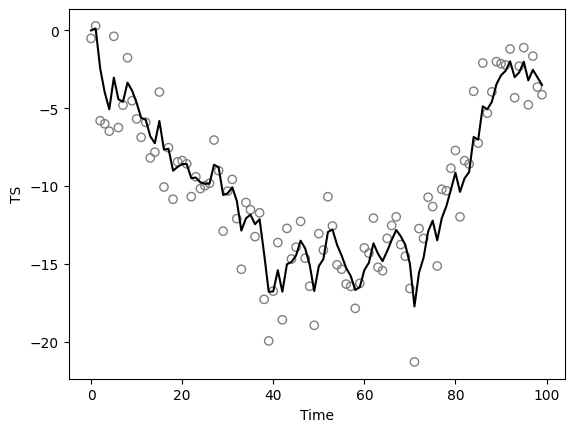

In [21]:
res = mistat.normRandomWalk(100, 3, 1, 1, seed=2)

fig, ax = plt.subplots()
ax.scatter(res.t, res.X, facecolors='none', edgecolors='grey')
ax.plot(res.t, res.predicted, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('TS')

plt.show()

#### Dynamic Linear Model With Linear Growth

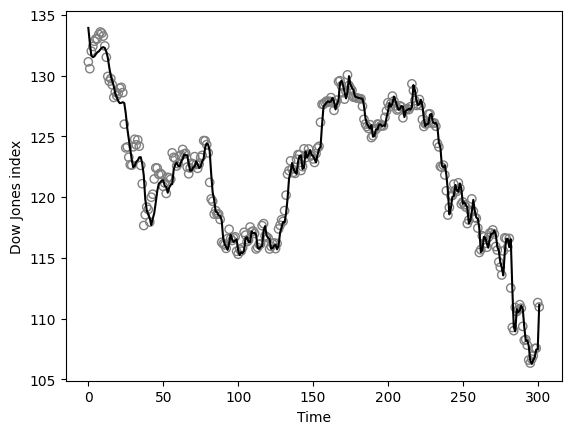

In [22]:
C0 = np.array([[0.22325, -0.00668], [-0.00668, 0.00032]])
M0 = np.array([134.234, -0.3115])
W = np.array([[0.3191, -0.0095], [-0.0095, 0.0004]])
v = 1

dow1941 = mistat.load_data('DOW1941.csv')
predicted = mistat.dlmLinearGrowth(dow1941, C0, v, W, M0)

fig, ax = plt.subplots()
ax.scatter(dow1941.index, dow1941, facecolors='none', edgecolors='grey')
ax.plot(dow1941.index, predicted, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Dow Jones index')
plt.show()

#### Dynamic Linear Model for ARMA(p,q)

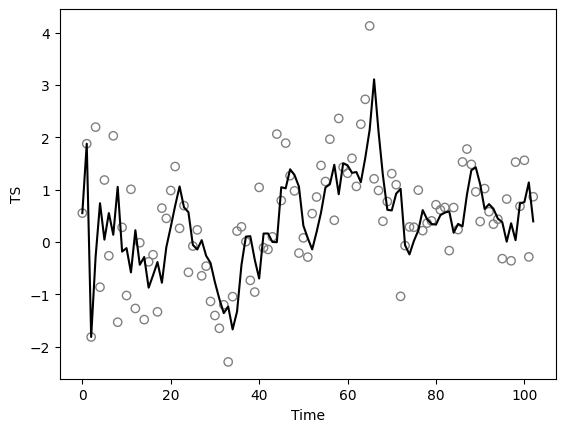

PMSE(ARMA) = 0.8505


In [23]:
a = [0.5, 0.3, 0.1]
b = [0.3, 0.5]
ts = pd.Series(mistat.simulateARMA(100, a, b, seed=1))
predicted = mistat.predictARMA(ts, a)

fig, ax = plt.subplots()
ax.scatter(ts.index, ts, facecolors='none', edgecolors='grey')
ax.plot(ts.index, predicted, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('TS')
plt.show()

print(f'PMSE(ARMA) = {np.mean((predicted - ts)**2):.4f}')

## Chapter Highlights

## Exercises